# This Script contains the following:
### 1. Importing of Libraries
### 2. Make a Subset of Data
### 3. Create Line Chart with Data
### 4. Decompose the Data's Components
### 5. Testing for Stationary
### 6. Stationarizing the Data

### 1. Importing of Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

In [2]:
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

In [3]:
plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [4]:
# define path
path =r"C:\Users\repla\Documents"

In [5]:
#Importing Data Set
df = pd.read_csv(r"C:\Users\repla\Documents\Achievement 6 - Provided Items\populationdata\POP.csv", index_col = False)

In [6]:
df.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [7]:
# Configure API key 

quandl.ApiConfig.api_key = 'yourAPIkey'

### 2. Make a Subset of Data

In [8]:
#create subset of data. Going to use 'value', and 'date'

In [9]:
subset = df[['value', 'date']]

In [11]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
 1   date    816 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


### 3. Create Line Chart with Data

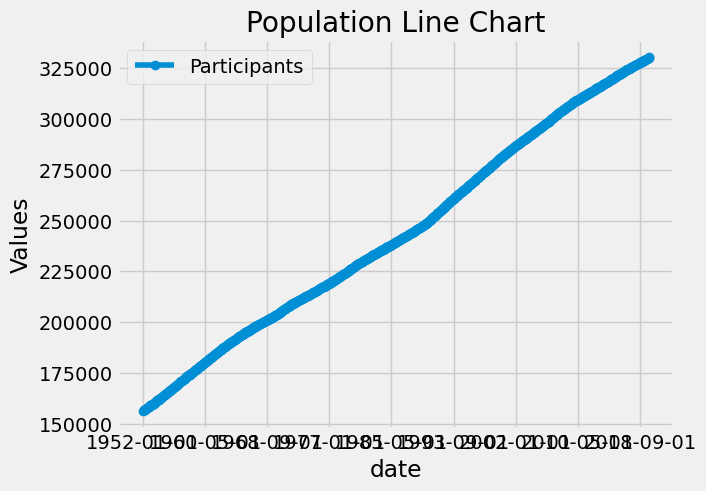

<Figure size 1500x500 with 0 Axes>

In [12]:
# Create a line chart
subset.plot(x='date', y=['value'], marker='o')
plt.title('Population Line Chart')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend(['Participants'])
plt.figure(figsize=(15,5), dpi=100)
plt.show()

In [24]:
# Check for missing values (you shouldn't have any)

subset.isnull().sum() 

value    0
dtype: int64

In [25]:
# Check for duplicates

dups = subset.duplicated()
dups.sum()

0

In [29]:
# Set the "Date" column as the index

from datetime import datetime

In [33]:
# Convert the index to a DatetimeIndex
subset.index = subset.index.to_timestamp()

In [34]:
subset.head()

,value
date,
1952-01-01,156309.0
1952-02-01,156527.0
1952-03-01,156731.0
1952-04-01,156943.0
1952-05-01,157140.0


### 4. Decompose the Data's Components

In [15]:
subset['date'] = pd.to_datetime(subset['date'])

In [17]:
subset = subset.set_index('date')

In [18]:
subset.index = pd.DatetimeIndex(subset.index).to_period('D')

In [35]:
decomposition = sm.tsa.seasonal_decompose(subset['value'], model='additive', period=1)

In [36]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

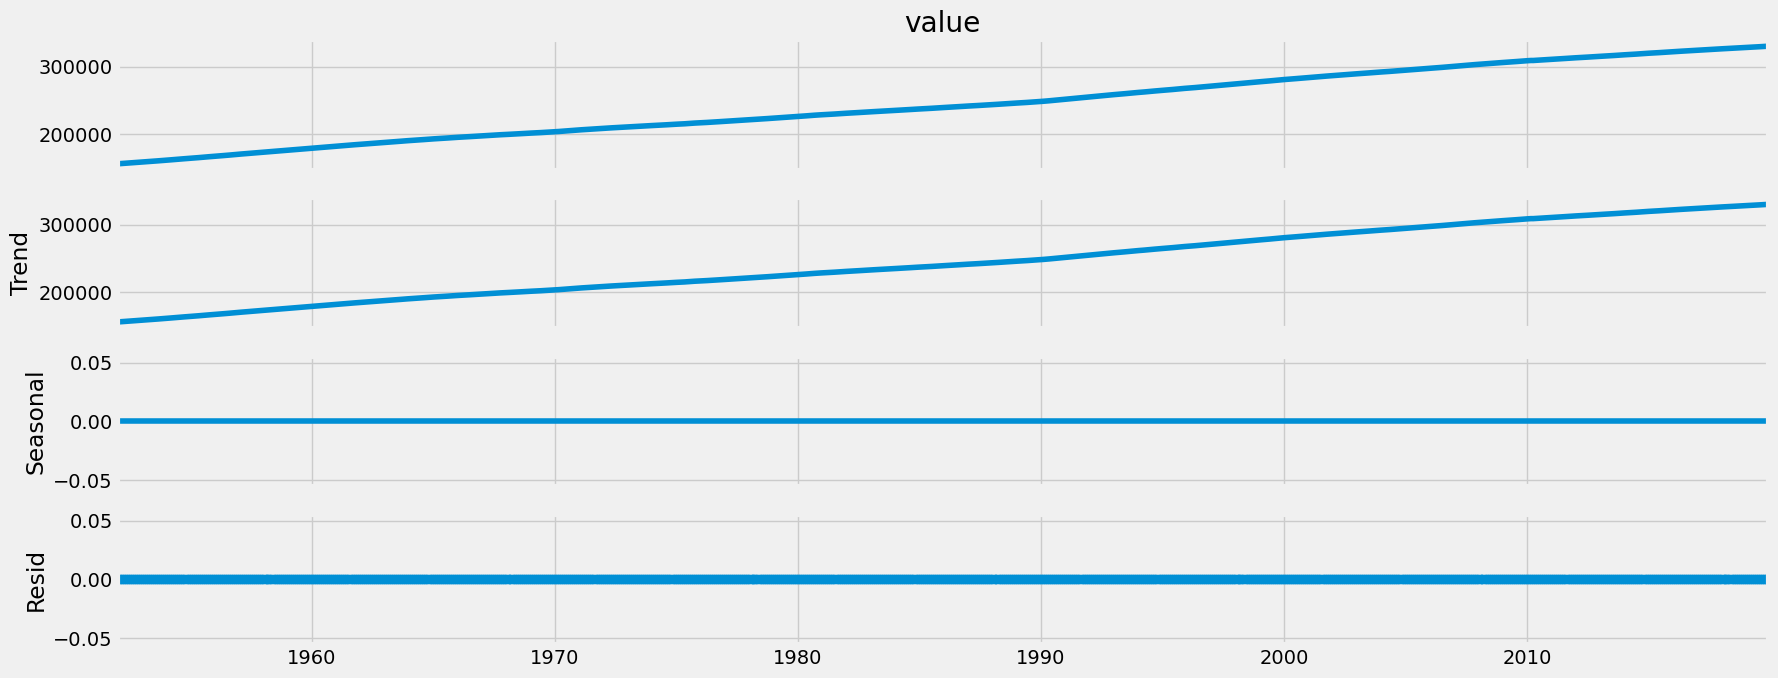

In [37]:
# Plot the separate components

decomposition.plot()
plt.show()

### 5. Testing for Stationary

In [38]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

In [39]:
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [41]:
# Apply the test using the function on the time series
dickey_fuller(subset['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.665317
p-value                          0.855530
Number of Lags Used             17.000000
Number of Observations Used    798.000000
Critical Value (1%)             -3.438571
Critical Value (5%)             -2.865169
Critical Value (10%)            -2.568702
dtype: float64


In [42]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

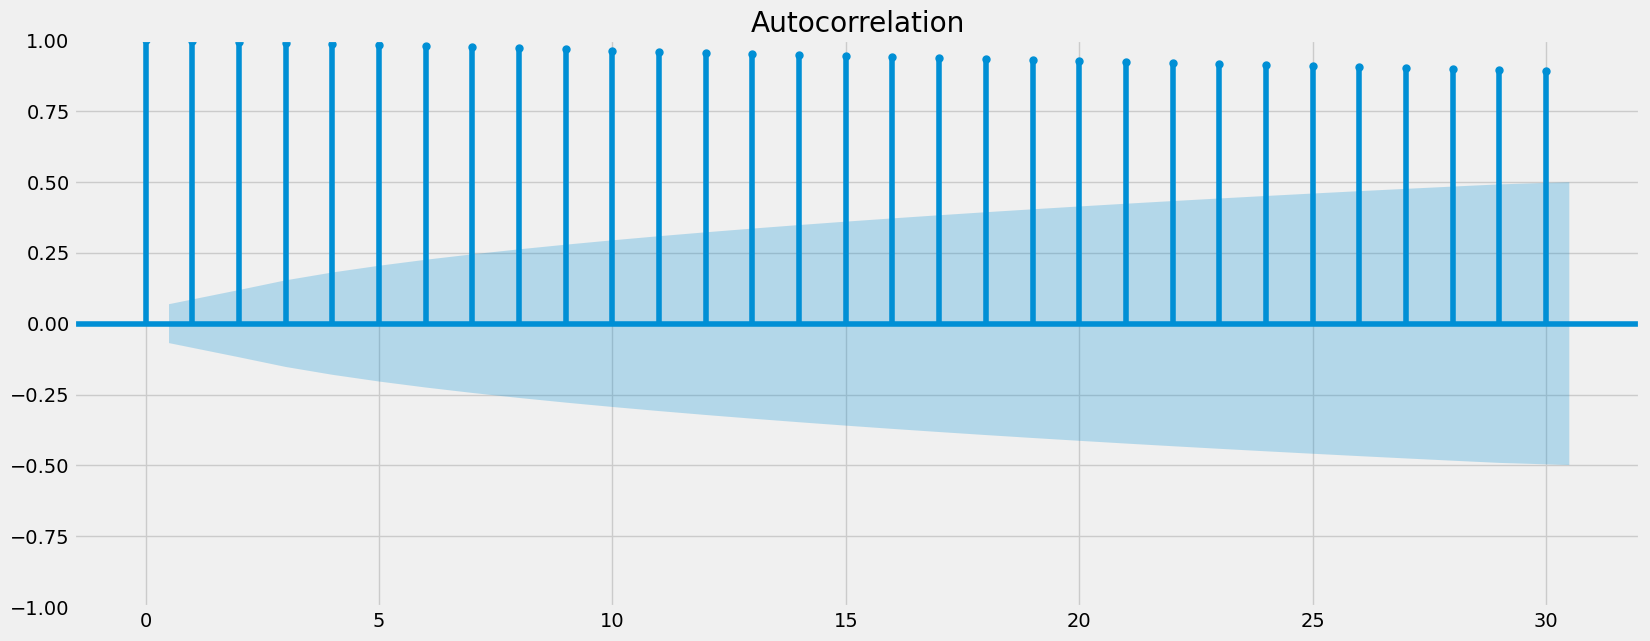

In [43]:
plot_acf(subset)
plt.show()

### 6. Stationarizing the Data

In [44]:
data_diff = subset - subset.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [45]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [46]:
data_diff.head()

,value
date,
1952-02-01,218.0
1952-03-01,204.0
1952-04-01,212.0
1952-05-01,197.0
1952-06-01,203.0


In [47]:
data_diff.columns

Index(['value'], dtype='object')

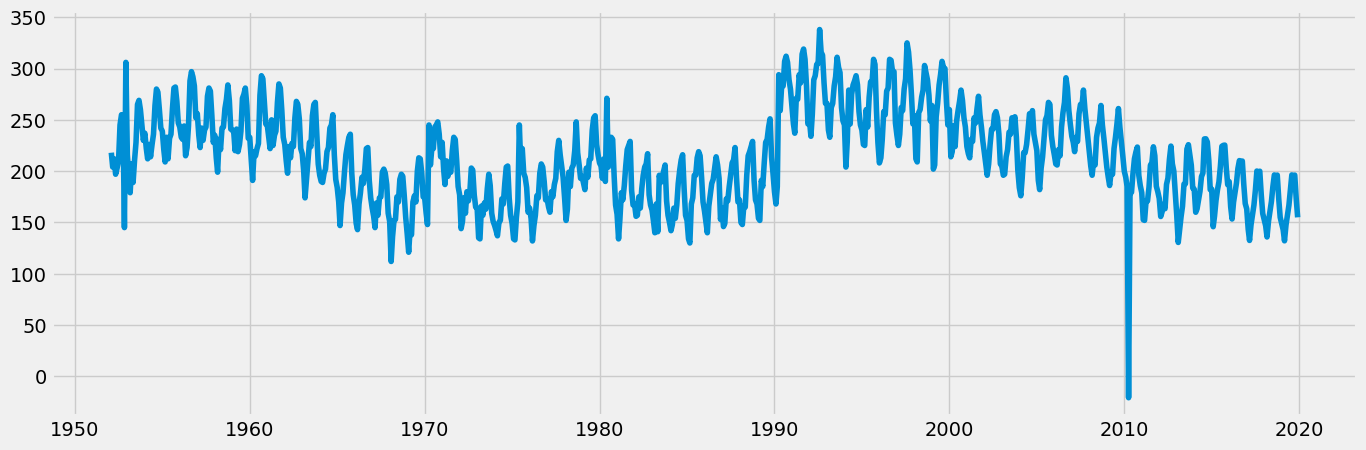

In [48]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [49]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.009895
p-value                          0.282251
Number of Lags Used             21.000000
Number of Observations Used    793.000000
Critical Value (1%)             -3.438623
Critical Value (5%)             -2.865192
Critical Value (10%)            -2.568714
dtype: float64


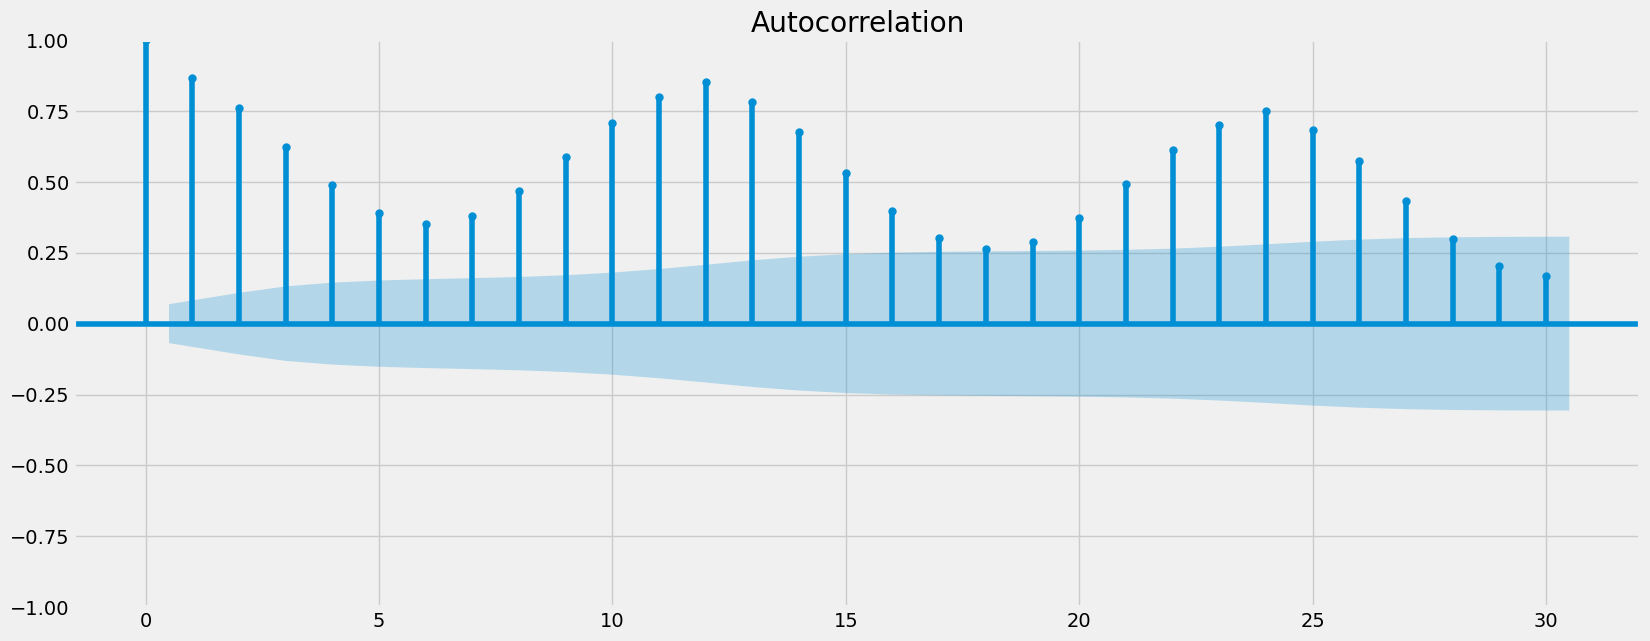

In [50]:
plot_acf(data_diff)
plt.show()

In [52]:
#Another attempt to make the data stationary

In [53]:
# Perform a second round of differencing
data_diff2 = data_diff - data_diff.shift(1)

In [54]:
data_diff2.dropna(inplace = True)

In [55]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -7.221128e+00
p-value                        2.110012e-10
Number of Lags Used            2.100000e+01
Number of Observations Used    7.920000e+02
Critical Value (1%)           -3.438634e+00
Critical Value (5%)           -2.865196e+00
Critical Value (10%)          -2.568717e+00
dtype: float64


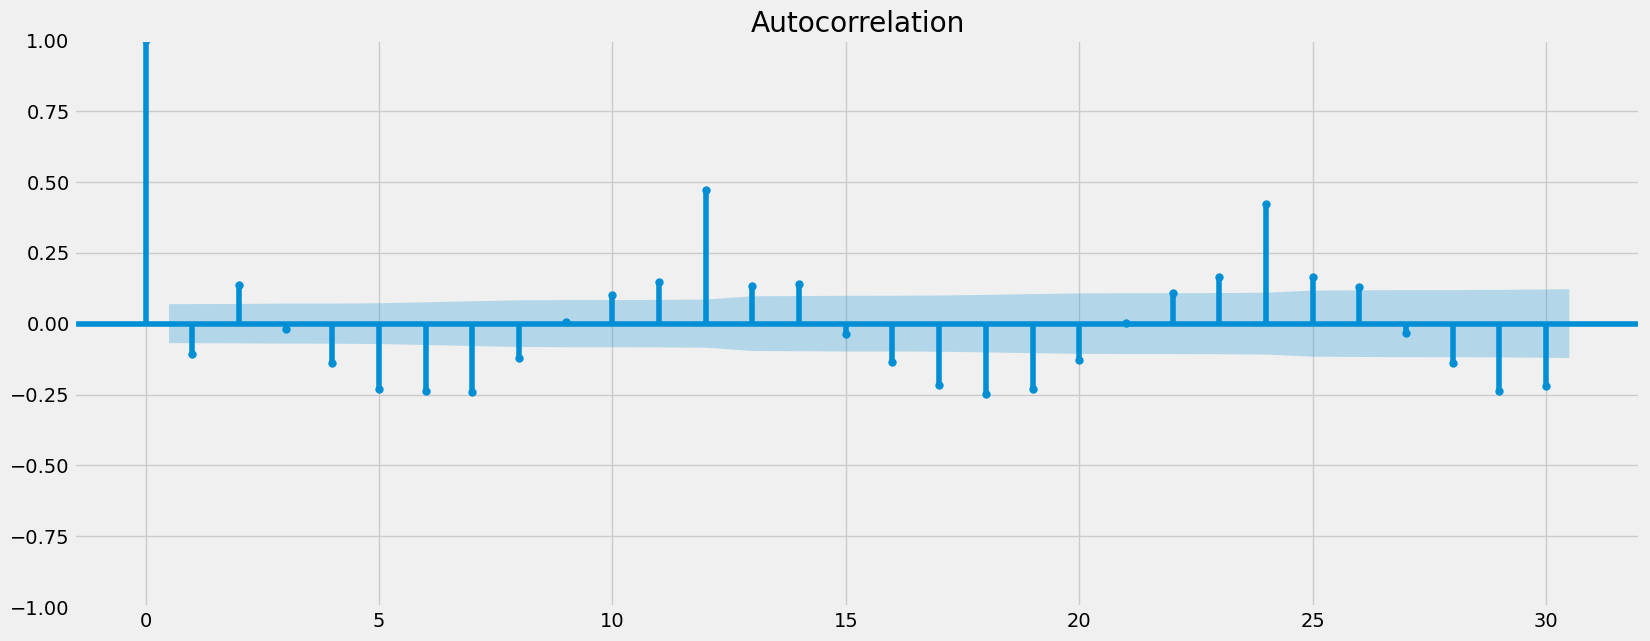

In [56]:
plot_acf(data_diff2)
plt.show()